In [45]:
from event_generator import Events

In [82]:
import matplotlib.pyplot as plt
import numpy as np
def plot(events):
    plt.figure(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    plt.grid()
    plt.savefig('example.png')
    plt.show()

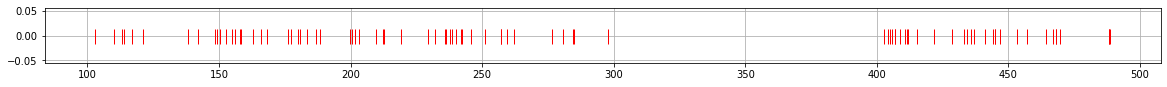

In [83]:
a = Events(1/3, [[100, 300], [400,500]])
plot(a.events)
# fig = plt.figure()
# fig.savefig('example.png', dpi=fig.dpi)

In [28]:
m = []
for i in range(10000):
    a = Events(0.25, [[0, 300], [400, 700]])
    s = 0
    for interval in a.intervals:
        s+=interval[1] - interval[0]
    m.append(len(a.events)/s)
print(sum(m)/len(m))

0.24988399999999952


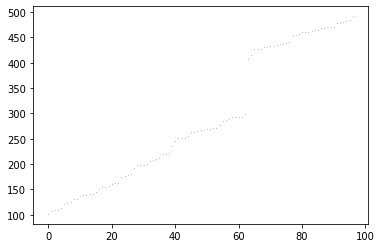

In [58]:
plt.plot(a.events, 'bo', markersize=0.1)
plt.show()

In [60]:
x = np.array(a.events)